# Histograms, Binnings, and Density

### Using the following datasets "flights.csv" dataset contains information about the flights of an airport. Airline "airlines.csv" data holds immense importance as it offers insights into the functioning and efficiency of the aviation industry. It provides valuable information about flight routes, schedules, passenger demographics, and preferences, which airlines can leverage to optimize their operations and enhance customer experiences.

### A)You should read both datasets and import the relevant libraries first

In [2]:
from numpy import integer
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

flights = pd.read_csv('./datasets/Datasets/flights.csv')
airlines = pd.read_csv("./datasets/Datasets/airlines.csv")

flights.head()

,id,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,...,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,name
0,0,2013,1,1,517.0,515,2.0,830.0,819,11.0,...,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01 05:00:00,United Air Lines Inc.
1,1,2013,1,1,533.0,529,4.0,850.0,830,20.0,...,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01 05:00:00,United Air Lines Inc.
2,2,2013,1,1,542.0,540,2.0,923.0,850,33.0,...,1141,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01 05:00:00,American Airlines Inc.
3,3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,...,725,N804JB,JFK,BQN,183.0,1576,5,45,2013-01-01 05:00:00,JetBlue Airways
4,4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,...,461,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01 06:00:00,Delta Air Lines Inc.


In [6]:
airlines.head()

,Passenger ID,First Name,Last Name,Gender,Age,Nationality,Airport Name,Airport Country Code,Country Name,Airport Continent,Continents,Departure Date,Arrival Airport,Pilot Name,Flight Status
0,ABVWIg,Edithe,Leggis,Female,62,Japan,Coldfoot Airport,US,United States,NAM,North America,6/28/2022,CXF,Fransisco Hazeldine,On Time
1,jkXXAX,Elwood,Catt,Male,62,Nicaragua,Kugluktuk Airport,CA,Canada,NAM,North America,12/26/2022,YCO,Marla Parsonage,On Time
2,CdUz2g,Darby,Felgate,Male,67,Russia,Grenoble-Isère Airport,FR,France,EU,Europe,1/18/2022,GNB,Rhonda Amber,On Time
3,BRS38V,Dominica,Pyle,Female,71,China,Ottawa / Gatineau Airport,CA,Canada,NAM,North America,9/16/2022,YND,Kacie Commucci,Delayed
4,9kvTLo,Bay,Pencost,Male,21,China,Gillespie Field,US,United States,NAM,North America,2/25/2022,SEE,Ebonee Tree,On Time


A) You should check the shape of the datasets

B) You should find the number of NaN values in both datasets

C) You should remove the NaN values

D) After removing them, You should double-check the number of NaN values in both datasets. What do you notice in this case?

In [8]:
print(flights.shape)
print(airlines.shape)

(336776, 21)
(98619, 15)


In [12]:
print(flights.isna().sum().sum())
print(airlines.isna().sum().sum())

46595
0


In [3]:
flights.dropna(inplace=True)
print(flights.isna().sum().sum())
airlines.dropna(inplace=True)
airlines.isna().sum().sum()

0


0

A) Now, you should combine the flights DataFrame with the airlines DataFrame to include additional information about the carriers by matching the carrier column from flights with the Passenger ID column from airlines?

Hint: use merge between two dataframe

In [4]:
flights_airlines = pd.merge(flights, airlines, how='left', left_on='carrier', right_on='Passenger ID')
flights_arrivals = flights_airlines[['arr_delay', 'name']]

In [22]:
flights_airlines

,id,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,...,Nationality,Airport Name,Airport Country Code,Country Name,Airport Continent,Continents,Departure Date,Arrival Airport,Pilot Name,Flight Status
0,0,2013,1,1,517.0,515,2.0,830.0,819,11.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2013,1,1,533.0,529,4.0,850.0,830,20.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2013,1,1,542.0,540,2.0,923.0,850,33.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
327341,336765,2013,9,30,2240.0,2245,-5.0,2334.0,2351,-17.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
327342,336766,2013,9,30,2240.0,2250,-10.0,2347.0,7,-20.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
327343,336767,2013,9,30,2241.0,2246,-5.0,2345.0,1,-16.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
327344,336768,2013,9,30,2307.0,2255,12.0,2359.0,2358,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


A) You should filter flight delays between -60 and 120 minutes

In [5]:
# filtered_flights_airlines = flights_airlines.loc[flights_airlines['arr_delay'] >= -60]
# filtered_flights_airlines = flights_airlines.loc[flights_airlines['arr_delay'] <= 120]
flights_arrivals = flights_arrivals[flights_arrivals['arr_delay'].between(-60, 120)]

In [33]:
flights_arrivals

,arr_delay,name
0,11.0,United Air Lines Inc.
1,20.0,United Air Lines Inc.
2,33.0,American Airlines Inc.
3,-18.0,JetBlue Airways
4,-25.0,Delta Air Lines Inc.
...,...,...
327341,-17.0,JetBlue Airways
327342,-20.0,JetBlue Airways
327343,-16.0,JetBlue Airways
327344,1.0,JetBlue Airways


A) You should plot a histogram using matplotlib, bins must be integer and the figure size is (9, 7) with a blue color

B) Make sure that you add a title and labels to the figure

C) Show 2 other different binwidths, density, and alpha

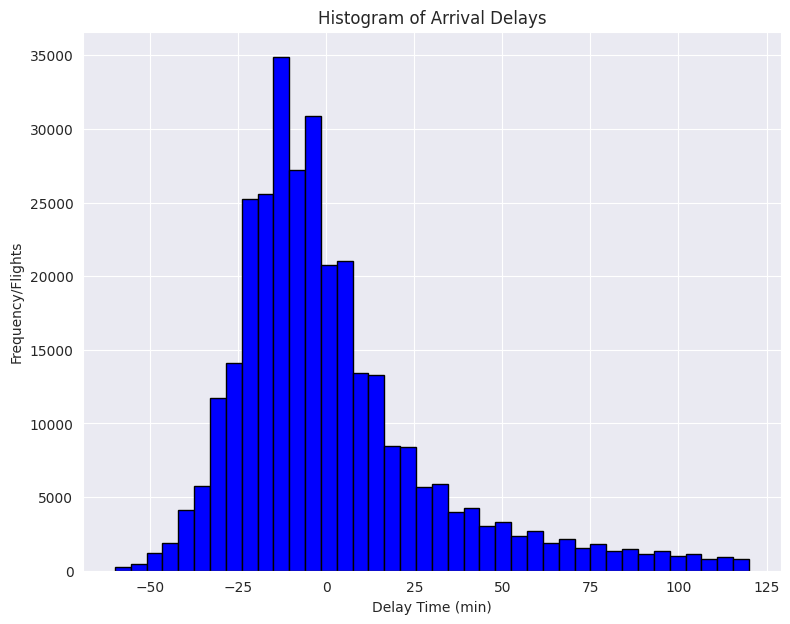

In [19]:
plt.figure(figsize=(9, 7))
plt.hist(flights_arrivals['arr_delay'], bins=40, edgecolor='black', color='blue')
plt.title("Histogram of Arrival Delays")
plt.xlabel("Delay Time (min)")
plt.ylabel("Frequency/Flights")
plt.show()
#Try to figure out why this is necessary i mean that it owrks with flights_arrivals but not with flights_airlines (might be because of the other data in airlines try to see why)
# print(flights_airlines['arr_delay'].tail(10))
# print(flights_arrivals['arr_delay'].tail(10))

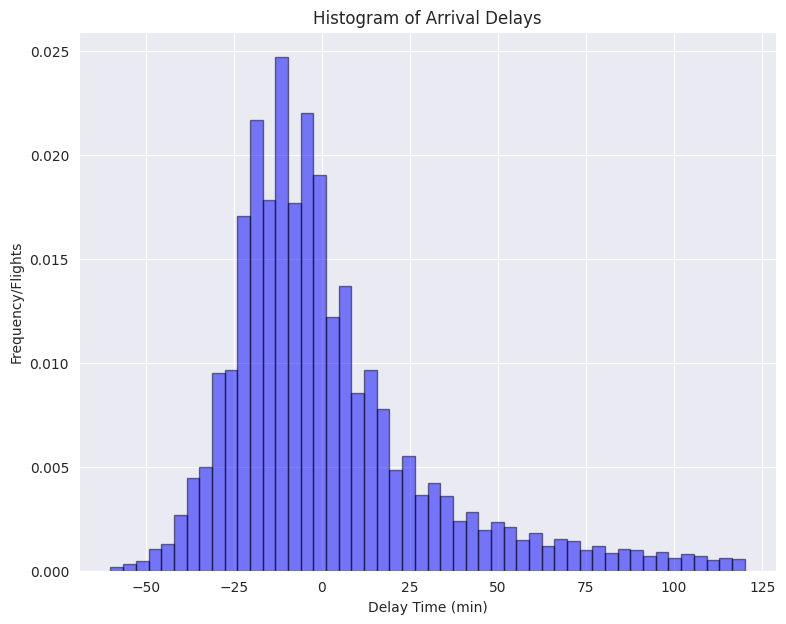

In [55]:
plt.figure(figsize=(9, 7))
plt.hist(flights_arrivals['arr_delay'], bins=50, edgecolor='black', color='blue', density=True, alpha=0.5)
plt.title("Histogram of Arrival Delays")
plt.xlabel("Delay Time (min)")
plt.ylabel("Frequency/Flights")
plt.show()

How do the arrival delays compare between two different carriers (AA and DL) for flights with delays ranging from 0 to 250 minutes?

We want to plot a histogram of Arrival Delays for Two Carriers ((AA and DL)) (250 minutes)
A) First, you should select delays from two different carriers

B) THen, filter delays to only include those between 0 and 250 minutes

C) The figure size (12, 12)

D) You should define the histogram properties using a dictionary:
    density, bins, alpha, histtype
D

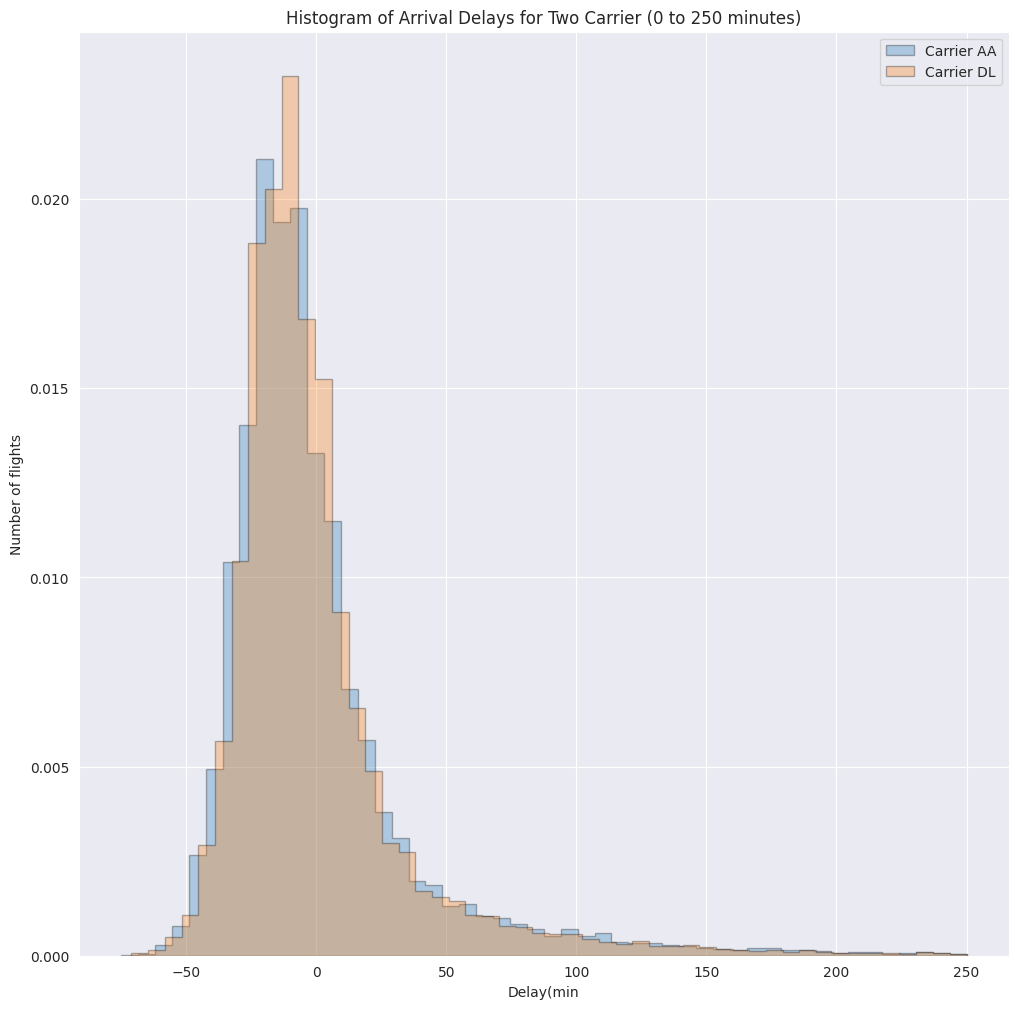

In [69]:
# flights_airlines[flights_airlines['carrier'] == 'AA'].count()#.sum() / len(flights_airlines.columns)-1
AA_flights = flights.loc[flights['carrier'] == 'AA', 'arr_delay']
DL_flights = flights.loc[flights['carrier'] == 'DL', 'arr_delay']
AA_flights = AA_flights[AA_flights <= 250]
# AA_flights = AA_flights[AA_flights >= 0]
# print(AA_flights)
DL_flights = DL_flights[DL_flights <= 250]
# DL_flights = DL_flights[DL_flights >= 0]
# print(DL_flights)

plt.figure(figsize=(12, 12))

kwargs = {
    'bins':50,
    'alpha':0.3,
    'density':True,
    'histtype':'stepfilled',
    'edgecolor':'black'
}

plt.hist(AA_flights, **kwargs, label='Carrier AA')
plt.hist(DL_flights, **kwargs, label='Carrier DL')

plt.title("Histogram of Arrival Delays for Two Carrier (0 to 250 minutes)")
plt.xlabel('Delay(min')
plt.ylabel('Number of flights')
plt.legend()
plt.show()
# print(AA_flights)

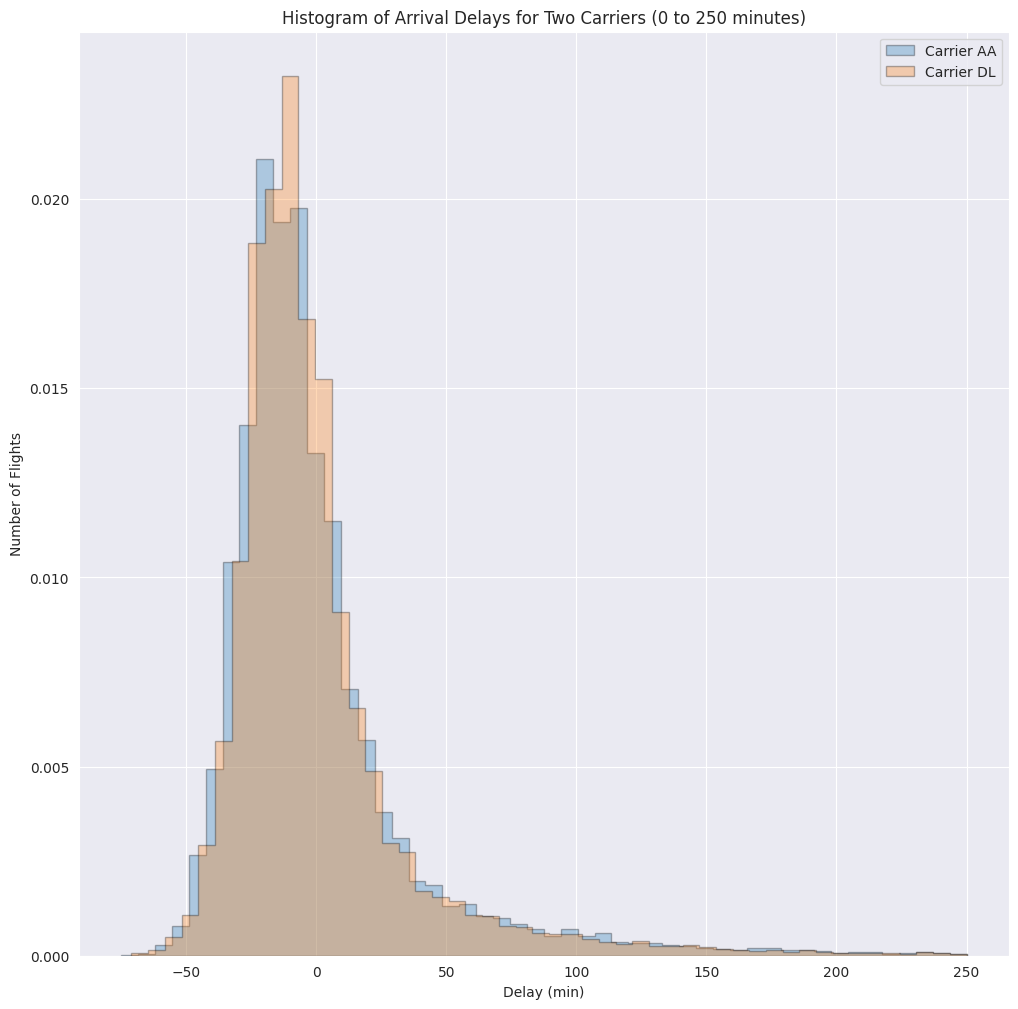

In [65]:

# Selecting delays from two different carriers
carrier1_delays = flights[flights['carrier'] == 'AA']['arr_delay'] 
carrier2_delays = flights[flights['carrier'] == 'DL']['arr_delay'] 

# Filter delays to only include those between 0 and 250 minutes
carrier1_delays = carrier1_delays[(carrier1_delays <= 250)]
carrier2_delays = carrier2_delays[(carrier2_delays <= 250)]

# Set the figure size
plt.figure(figsize=(12, 12))

# Define histogram properties
kwargs = {
    'bins': 50,               # Number of bins
    'alpha': 0.3,             # Transparency of the bars
    'density': True,
    'histtype': 'stepfilled',
    'edgecolor': 'black'      # Color of the edges
}

# Plot the histograms
plt.hist(carrier1_delays, **kwargs, label='Carrier AA')
plt.hist(carrier2_delays, **kwargs, label='Carrier DL')

# Add titles and labels
plt.title('Histogram of Arrival Delays for Two Carriers (0 to 250 minutes)')
plt.xlabel('Delay (min)')
plt.ylabel('Number of Flights')
plt.legend()